## Histogramas en Python a mano

#### Histogramas sin el uso de librerias

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [2]:
#Defino una funcion que un conteo de elementos devuelva un diccionario
def count_elements(seq) -> dict:

#En python para dejar comentarios dentro de una función tambien es posible 
#escrbiendo 3comillas(""") al inicio para abrir
#y 3 al final para cerrar Ej.
    """
    Función que cuenta las frecuencias de aparición 
    de cada elemento de la secuencia, creando un diccionario 
    como si fuese una tabla de frecuencias
    """
    hist = {} #Diccionario vacio
    #Para cada uno de los elementos, los indices que aparecen en el interior de la secuencia
    for i in seq:
        hist[i] = hist.get(i, 0)+1 #Con get obtengo el objeto con clave dentro del histograma, 
                              #y si no existe agrega cero
    return hist

In [3]:
fAbs = count_elements(x)

In [4]:
fAbs #Aqui da el valor de las frecuencias absolutas
#eso es en razon que el diciconario me informa la cantidad de veces que
#aparece cada numero, ej.
#0 aparece 1 vez
# 1 aparece 3 vezes
# 2 aparece 2 vezes .... 25 aparece 1 vez

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

Por lo tanto fijaros que la función count_elements devuelve un diccionario con claves, los elementos
únicos que forman parte de la secuencia y las frecuencias el count la frecuencia absoluta como los valores
del mismo. Fijaros que lo estoy trabajando a mano, lo estoy construyendo mi propia función mi propio numpy
y por así decir fijaros que a la vez que hacemos el bucle "for i" de la secuencia a la vez que voy recorriendo
la instrucción más importante que tengo señalada aquí de color azul 

Explicación de la función: hist[i] = hist.get(i, 0)+1
HIST para la clave [i]  es igual a HIST punto get que el que hubiera en la posición [i] y si no hay devuelve un cero y añade L1 que se podría traducir:
como por cada elemento de la secuencia incrementa su valor correspondiente del diccionario HIST en una unidad

In [7]:
#Forma automatica usando libreria
from collections import Counter
fAbs2 = Counter(x)
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [9]:
#Para verificar si los itens del diccionario fAbs es igual al diccionario fAbs2
fAbs.items() == fAbs2.items()

True

In [10]:
# Ascci estandar de caracteres internacional
def ascci_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    #Cada clave k en la versión ordenada (sort) de las frecuencias absolutas
    for k in sorted(fAbs):
              #Desde 0 hasta 5d digitos, espacio, 1 valor {1} - > formateamos la propia clave con .format
                                            # y se multiplica por la frecuencia absoluta para el parametro k
        print('{0:5d} {1}' .format(k, '+'*fAbs[k])) #
    

{0:5d} Reservo 5 espacios para el digito en cuestion, para la clave del elemento
depues:
agrego el simbolo +
'+' tantas vezes como indique la frecuencia absoluta de la clave = '+'*fAbs[k]

In [11]:
ascci_histogram(x) #Provando la función Ascci

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [15]:
import random
random.seed(2019)
vals = [1,2,3,5,7,8,9,10] #valores del eje x
#Frecuencias absolutas es: un array generado con un random que es entre 5 y 20
#For para cada _ (Barra baja ou para cada valor que este disponible en el array vals)

# Es decir: Para cada uno de los valores que esta en el conjunto vals, 
                        #se generara un numero aleatorio entre 5 y 20
freqs = (random.randint(5,20) for _ in vals) #Esto genera datos

data = [] #Voy a crear un array vacio
#For para cada calve k, y valor (v)
#dentro de juntar la par zip
#Función zip es usada para juntar 2 arrays por cada lado diferente y correrlos a la par
for k, v in zip(vals, freqs):
#La variable k tomara cada uno de los valores que esta en vals
#la variable v tomara cada uno de los valores que se va a generar en freqs
    data.extend([k]*v)

data #imprimo el valor

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [16]:
#Ahora para contar cuantos datos hay en el histograma anterior aplico la funcion assci
ascci_histogram(data) #Frecuencias absolutas con resultado +

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


### Histogramas con NumPy 

In [7]:
import numpy as np
np.random.seed(2019)

np.set_printoptions(precision = 3) #Para tener valores solo con 3 decimales

#distribuciń la place, 
x = np.random.laplace(loc = 10, #centrada en 10
                     scale = 3, #Factor de escala 3
                     size = 1000) #cantidad de muestras 1000
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [17]:
#Agrupamos la informacion en intervalos
#Objeto hist
      #Divisiones usando el objeto hist
hist, bin_edges = np.histogram(x)

print(hist) #Va a mostrar las frecuencias de cada una de las divisiones

print(' ')

print(bin_edges) #Para consultar las divisiones

#esto se lee:
#-19.167 -14.642 hay 1 observación
#-14.642 -10.118 hay 0 observación
#-10.118  -5.593 hay 0 observación
#.... 
#21.553  26.077 hay 9 observación

print(' ')

print(hist.size, bin_edges.size) #Aparecen la cantidad de divisiones 
#y es cerrados por la izquierda y abiertos por la derecha

[  1   0   0   8  48 194 542 167  31   9]
 
[-19.167 -14.642 -10.118  -5.593  -1.069   3.455   7.98   12.504  17.029
  21.553  26.077]
 
10 11


In [19]:
#Obteniendo los valores automaticos de la linea anterior con procedimientos a mano
min_edge = x.min() #Valor minimo
max_edge = x.max() #Valor maximo

n_bins = 10 #Python simula automaticamente ya 10 divisiones
bin_edges = np.linspace(start = min_edge,
                        stop = max_edge,
                        num = n_bins+1,
                        endpoint=True) #Incluir el ultimo valor
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [28]:
# bincount solo cuenta los objetos con numeros enteros
x1 = (0,1,1,1,2,2,3,7,7,7,25)
bcount = np.bincount(x1) #Conteo de los datos por numero
print(bcount)

print(' ')

#Haciendo de forma manual la operacion np.bicount
hist, _=np.histogram(x1,
                     range = (0, max(x1)),
                     bins = max(x1)+1)

print(hist)

print(' ')

#Para verificar que son exactamente iguales bcount y hist hago:
print(np.array_equal(bcount,hist)) #Da verdadero significa que son exactamente iguales bcount e hist

print(' ')

#Creo un diccionario agrupando con zip asi verifico cuantos valores hay de cada numero
dict(zip(np.unique(x1),
        bcount[bcount.nonzero()]))

[1 3 2 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 
[1 3 2 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 
True
 


{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

### Histogramas con Matplotlib y Pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(0.0, 140.0)

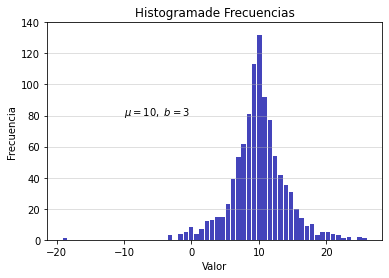

In [42]:
np.random.seed(2019)
np.set_printoptions(precision = 3) #Para tener valores solo con 3 decimales

#distribuciń la place, 
x = np.random.laplace(loc = 10, #centrada en 10
                     scale = 3, #Factor de escala 3
                     size = 1000) #cantidad de muestras 1000

#Graficando el histograma
n, bins, patches = plt.hist(x = x, #Datos a graficar
                            #Para efectos de la grafica el bins auto utiliza regla de
                            #freedman ou scot, pero si queremos informar un valor solo escribimos
                            #El numero para que haga la grafica con los valores que queramos.
                            #Ejemplo, cambiamos 'auto' por un numero 13 y el grafica solamente con 13 variables
                           bins = 'auto', #valor por defecto para elegir las divisiones del histograma
                           color = '#0505a5', #color en exadecimal
                           alpha = 0.75,#Transparencia para que tenga 3/4 de color
                           rwidth = 0.85) # grosor de las lineas

plt.grid(axis = 'y', #Rayas horizontales
         alpha = 0.5) #Transparencia de las rayas horizontales
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title("Histogramade Frecuencias")
plt.text(-10,80, r'$\mu = 10, \ b= 3$')
#Se adiciona el siguiente codigo para que en el momento de graficar
#Tenga los valores en y 10 puntos por encima del valor maximo de la tabla de valores
#De esa forma aparece la grafica dentro del cuadro correctamente
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10 )

In [40]:
print(n) #Contiene las frecuencias de cada una de las divisiones

print(' ')

print(bins) #Extremos de cada uno de los datos del histograma

print(' ')

print(patches) #Una lista de los 50 objetos del histograma

[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   3.   0.   4.   5.   8.   4.   7.  12.
  13.  15.  15.  23.  39.  53.  62.  81. 113. 132.  92.  77.  54.  42.
  35.  31.  20.  14.   9.  10.   3.   5.   5.   4.   3.   1.   2.   0.
   2.   1.]
 
[-19.167 -18.387 -17.606 -16.826 -16.046 -15.266 -14.486 -13.706 -12.926
 -12.146 -11.366 -10.586  -9.806  -9.026  -8.246  -7.466  -6.685  -5.905
  -5.125  -4.345  -3.565  -2.785  -2.005  -1.225  -0.445   0.335   1.115
   1.895   2.675   3.455   4.236   5.016   5.796   6.576   7.356   8.136
   8.916   9.696  10.476  11.256  12.036  12.816  13.596  14.376  15.157
  15.937  16.717  17.497  18.277  19.057  19.837  20.617  21.397  22.177
  22.957  23.737  24.517  25.297  26.077]
 
<BarContainer object of 58 artists>


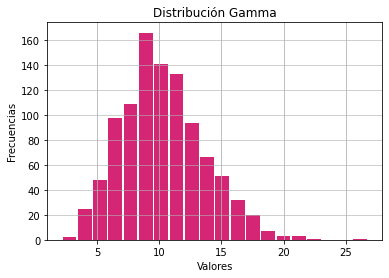

In [21]:
# Histograma de pandas usando series (colecciones de datos)
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size = size))
data.plot.hist(grid = True, #Para que agrege rejillas
               bins = 20, #20 divisiones
               rwidth = 0.9, #Grosor de las lineas
               color ='#d52675')
plt.title('Distribución Gamma')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.grid(axis = 'y',
         alpha = 0.75)

Tarea importar algun data frame e invocar la función plot.hist para ver representada
los diferentes histogramas para cada uno de los datos del data Frame

### Funciones de densidad en Python

In [4]:
mu = 10, 20 #Media
sigma = 5,2  #Desviación estandar
dist =pd.DataFrame(np.random.normal(loc =mu,
                                   scale = sigma,
                                   size = (1000, 2)), columns = ['x1', 'x2'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals = 2)

,x1,x2
min,-4.07,14.43
max,26.06,26.20
mean,9.90,20.10
std,4.81,1.99


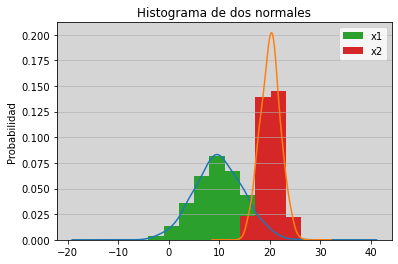

In [5]:
fig, ax = plt.subplots()

#Grafica las 2 lineas, la azul y la naranja
dist.plot.kde(ax = ax,
              legend = False,
              title = 'Histograma de dos normales')

#Grafica las barras, la verde y la roja
dist.plot.hist(density = True,
               ax = ax)

ax.set_ylabel('Probabilidad') #Nombre de probabilidad en el eje Y

#Rejilla gris en el eje de las Y
ax.grid(axis = 'y',
        alpha = 0.75)
ax.set_facecolor('#d5d5d5') #Color de fondo

Text(-2.5, 0.35, '$f(x) = \\frac{e^{(-x^2)/2}}{\\sqrt{2/pi}}$')

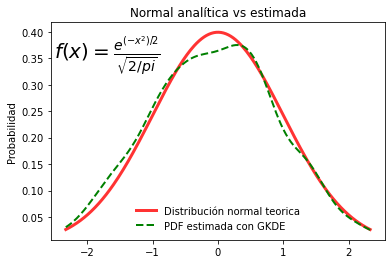

In [15]:
#Forma analitica de la distribución normal (Parte avanzada del curso)

from scipy import stats

dist = stats.norm() #Distribución normal teorica N(0,1) - exp(-x**2/2)/sqrt(2*pi)
sample = dist.rvs(size = 1000)
x = np.linspace(start = stats.norm.ppf(0.01),
                stop = stats.norm.ppf(0.99),
                num  = 250)
gkde = stats.gaussian_kde(dataset = sample) #Valores que salen de la muestra

fig, ax = plt.subplots()

#Grafica original a partir de los datos generados aleatoriamente.
ax.plot(x,
       dist.pdf(x),
       linestyle = 'solid',
       c = 'red',
       lw = 3,
       alpha = 0.8,
       label = 'Distribución normal teorica')

#La grafica aproximada que sale a partir de la muestra
ax.plot(x, gkde.evaluate(x), 
        linestyle = 'dashed',
        c = 'green',
       lw = 2,
       label = 'PDF estimada con GKDE')
ax.legend(loc = 'best',
         frameon = False)
ax.set_title('Normal analítica vs estimada')
ax.set_ylabel('Probabilidad')
ax.text(-2.5, 0.35, #Ajuste del texto en el eje x = -2,5 y = 0,35
        r'$f(x) = \frac{e^{(-x^2)/2}}{\sqrt{2/pi}}$', #texto en markdawon
       fontsize = 20) #Tanaño del texto

In [17]:
print(stats.norm.ppf(0.01)) #Percenti 1 de la normal
print(stats.norm.ppf(0.99)) #Percentil 99 de la normal

-2.3263478740408408
2.3263478740408408


### Otras alternativas para representar histogramas

#### Histogramas con Seaborn

In [16]:
import seaborn as sb

/home/arturo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

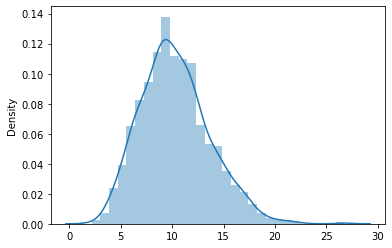

In [22]:
data = pd.Series(np.random.gamma(scale, size = size)) #Función realizada en ejercicio pasado
sb.distplot(data) #Grafica

/home/arturo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

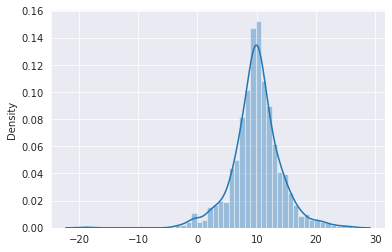

In [25]:
np.random.seed(2019)
#distribuciń la place, 
x = np.random.laplace(loc = 10, #centrada en 10
                     scale = 3, #Factor de escala 3
                     size = 1000) #cantidad de muestras 1000
sb.set_style('darkgrid') #Agrego una rejilla oscura en el fondo
sb.distplot(x) #Grafica

/home/arturo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

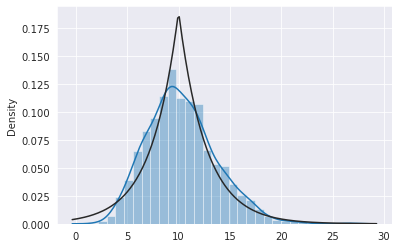

In [29]:
sb.distplot(data, #Conjunto de datos a graficar
           fit = stats.laplace) #Para que grafique las lineas laplace

/home/arturo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

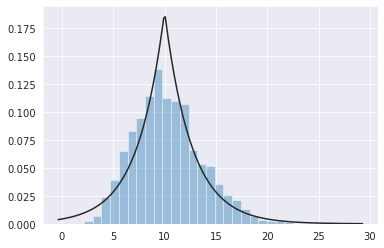

In [30]:
sb.distplot(data, #Conjunto de datos a graficar
            fit = stats.laplace,#Para que grafique las lineas laplace
            kde = False)  #Elimina la grafica de la distribución de comparación

#Realiza la distribución de bonda y ajuste para ver que grafica se adapta mas a los datos de estudio

In [32]:
data2 = np.random.choice(np.arange(10),
                         size = 10000,
                         p = np.linspace(1,11,10)/60)

#Transformo en objeto series
s = pd.Series(data2)
print(s.value_counts()) #Frecuencias absolutas

print(' ')

print(s.value_counts(normalize=True)) #Frecuencias relativas

9    1817
8    1650
7    1520
6    1288
5    1096
4     877
3     705
2     528
1     364
0     155
dtype: int64
 
9    0.1817
8    0.1650
7    0.1520
6    0.1288
5    0.1096
4    0.0877
3    0.0705
2    0.0528
1    0.0364
0    0.0155
dtype: float64


In [36]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21,np.inf) #Extremos de los intervalos para dividir la información
labels = ('infancia', 'preadolescencia','adolescencia','universitario','adulto')
groups = pd.cut(ages,
               bins = bins, #Lo considera como factores ordenados
               labels = labels)
print(groups)

print(' ')

print(groups.value_counts())

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' < 'adulto']
 
infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64


In [38]:
#Concatenando ages y groups
pd.concat((ages,groups), 
                   #Creo un diccionario para agregar el titulo
           axis = 1).rename(columns = {0:'age', 1:'groups'})

,age,groups
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
